In [35]:
import numpy as np

(1900544, 2)


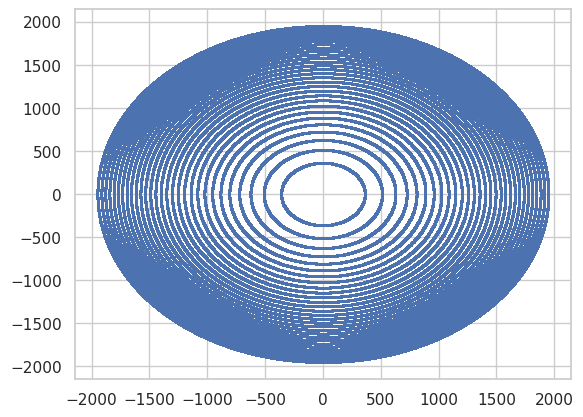

In [36]:
scaling_factor = 65536

def papernot_sample(N: int):
    u1 = np.random.randint(0, scaling_factor, N)
    u2 = np.random.randint(0, scaling_factor, N)
    r = (scaling_factor * np.sqrt(-2 * np.log((u1 + 1) / (scaling_factor + 1)))).astype(int)
    sample = np.stack([r * (scaling_factor * np.cos(2 * np.pi * u2 / scaling_factor)).astype(int), r * (scaling_factor * np.sin(2 * np.pi * u2 / scaling_factor)).astype(int)], axis= 1)
    sample += (scaling_factor >> 1)
    sample //= scaling_factor
    return sample


def papernot_suport(radius: float):
    u1 = np.arange(0, scaling_factor)
    u2 = np.arange(0, scaling_factor)
    r = (scaling_factor * np.sqrt(-2 * np.log((u1 + 1) / (scaling_factor + 1)))).astype(int)
    mask = r < (scaling_factor * radius)
    theta = (scaling_factor * np.stack([np.cos(2 * np.pi * u2 / scaling_factor), np.sin(2 * np.pi * u2 / scaling_factor)], axis= 1)).astype(int)
    supp = r[mask, None, None] * theta[None, :, :]
    supp += (scaling_factor >> 1)
    supp //= scaling_factor
    return supp.reshape(-1, 2)
    
supp = papernot_suport(0.03)
print(supp.shape)

# Plot the samples in 2D
import matplotlib.pyplot as plt
plt.scatter(supp[:, 0], supp[:, 1], marker='o', s=1)
plt.show()


In [45]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('../logs/vrr.csv')

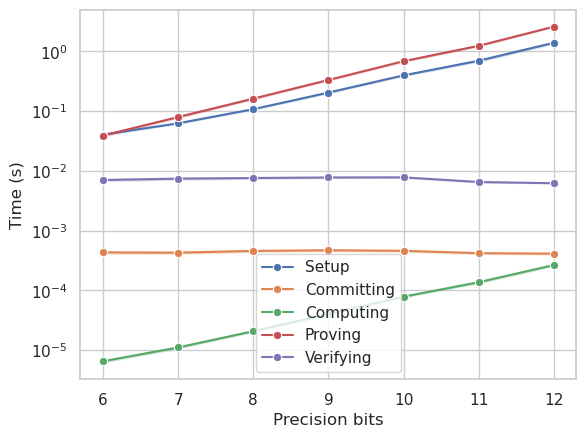

In [73]:
# use seaborn
import seaborn as sns
sns.set(style="whitegrid")

# plot (setup, committing, computing, proving, verifying) |vs inv_prec with error bar
plt.figure()
sns.lineplot(x = 'log_prec', y = 'setup', data = df, marker='o', label='Setup')
sns.lineplot(x = 'log_prec', y = 'committing', data = df, marker='o', label='Committing')
sns.lineplot(x = 'log_prec', y = 'computing', data = df, marker='o', label='Computing')
sns.lineplot(x = 'log_prec', y = 'proving', data = df, marker='o', label='Proving')
sns.lineplot(x = 'log_prec', y = 'verifying', data = df, marker='o', label='Verifying')
plt.legend()

# y axis in log scale
plt.yscale('log')

# x axis legend: precision bits
plt.xlabel('Precision bits')

# y axis legend: time in seconds
plt.ylabel('Time (s)')



plt.show()


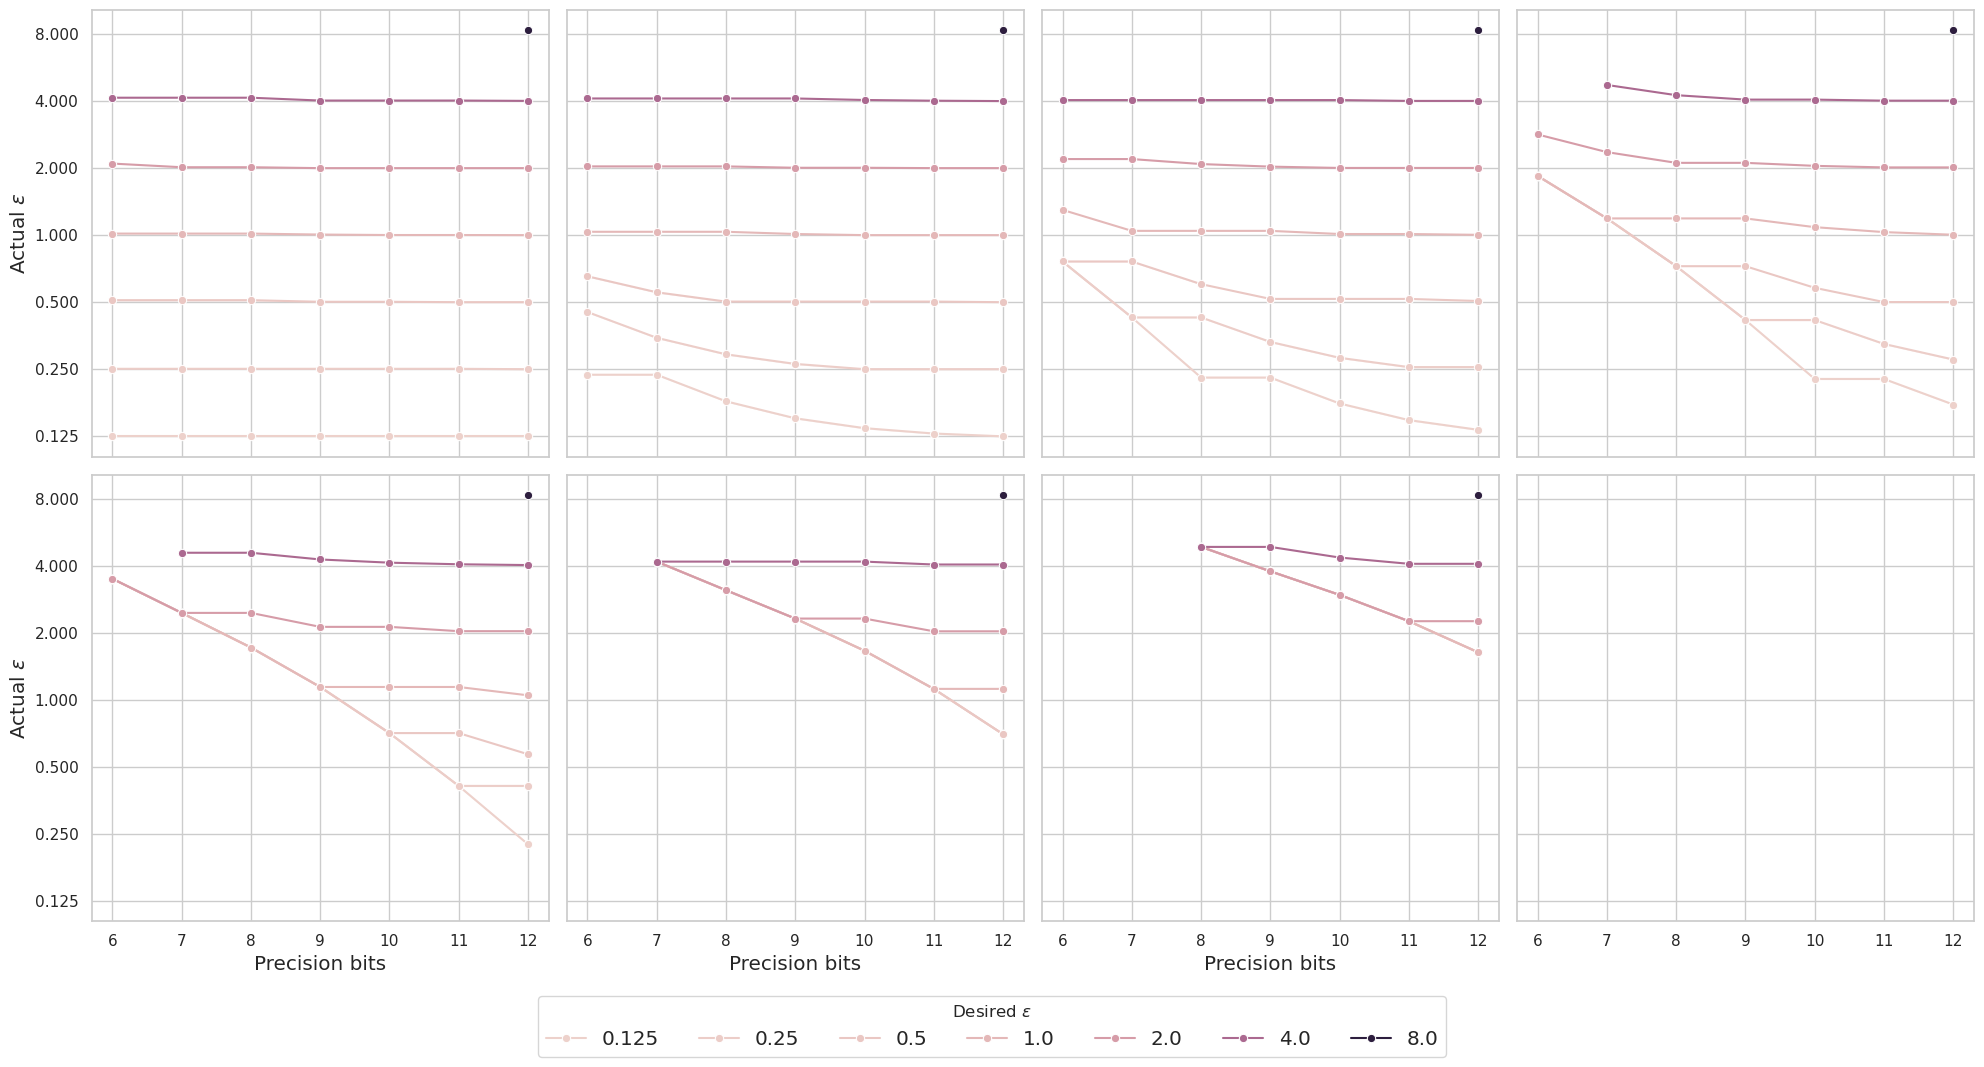

In [98]:
# use seaborn
import seaborn as sns
sns.set(style="whitegrid")

# make a 2 * 4 grid of plots
fig, axs = plt.subplots(2, 4, figsize=(20, 10), sharex=True, sharey=True, tight_layout=True)

# plot (setup, committing, computing, proving, verifying) vs inv_prec with error bar

for ax, NUM_CLASS in zip(axs.flatten(), df['num_class'].unique()):
    sns.lineplot(x = 'log_prec', y = 'actual_eps', hue = 'eps', data = df[df['num_class'] == NUM_CLASS], marker='o', legend='full', ax = ax)

    # x, y axis in log2 scale
    ax.set_yscale('log')
    ax.set_yticks([0.125, 0.25, 0.5, 1, 2, 4, 8])
    # also display these numbers
    ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
    ax.get_yaxis().set_major_formatter(plt.ScalarFormatter())

    # add a title to the legend
    ax.legend(title='$\epsilon$')


    # x axis legend: precision bits
    ax.set_xlabel('Precision bits', fontsize='large')

    # y axis legend: time in seconds
    ax.set_ylabel('Actual $\epsilon$', fontsize='large')
    # grasp one legend and put the legend at the buttom, detele the legends in the subplots
    handles, labels = ax.get_legend_handles_labels()
    ax.legend().remove()

# put the legend at the buttom
# move a little bit lower so as not to block the figure
fig.legend(handles, labels, bbox_to_anchor=(0.5, -0.075), loc='lower center', ncol=8, title='Desired $\epsilon$', fontsize='large')

plt.show()


In [10]:
import math

def bc23_get_cost(eps: float, delta: float = 1e-10):
    # compute the number of bits
    nb = math.ceil(10 * math.log(2/delta) / (eps ** 2))
    l1 = math.sqrt(nb/2) / math.sqrt(math.pi)
    return eps, delta, nb, l1

def b23_multidim_get_cost(d: int, eps: float):
    # compute the number of bits
    _, _, nb, _ = bc23_get_cost(eps)
    return nb * d

def b23_multidim_get_comm(d: int, eps: float):
    # compute the number of bits
    return (b23_multidim_get_cost(d, eps) * ((5 * 32) + (3 * 96))) / (1 << 20)

In [11]:
b23_multidim_get_comm(1024, 0.1)

10377.0625

In [14]:
for d in [16, 64, 256, 1024]:
    for eps in [0.001, 0.01, 0.1, 1]:
        print(b23_multidim_get_comm(d, eps))   

1621415.892578125
16214.16015625
162.1416015625
1.626953125
6485663.5703125
64856.640625
648.56640625
6.5078125
25942654.28125
259426.5625
2594.265625
26.03125
103770617.125
1037706.25
10377.0625
104.125
